In [83]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

c:\program files (x86)\python35-32\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
celine_vse = pd.read_csv('celine.csv', index_col = "Country Code")
celine_vse.head()

,Domain Code,Domain,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
Country Code,,,,,,,,,,,,,
5100,QC,Crops,Africa,5312,Area harvested,406,Garlic,1964,1964,Ha,7190.0,A,"Aggregate, may include official, semi-official..."
5100,QC,Crops,Africa,5419,Yield,406,Garlic,1964,1964,Hg/Ha,103451.0,Fc,Calculated data
5100,QC,Crops,Africa,5510,Production,406,Garlic,1964,1964,tonnes,74381.0,A,"Aggregate, may include official, semi-official..."
5200,QC,Crops,Americas,5312,Area harvested,406,Garlic,1964,1964,Ha,38601.0,A,"Aggregate, may include official, semi-official..."
5200,QC,Crops,Americas,5419,Yield,406,Garlic,1964,1964,Hg/Ha,37839.0,Fc,Calculated data


In [91]:
celine = celine_vse.drop(["Domain Code", "Domain", "Element Code", "Item", "Item Code", "Unit", "Flag Description"], axis = 1)
celine
#pridelek = celine[celine["Element"] == "Yield"]
#povrsina = celine[celine["Element" == "Area harvested"]]

,Country,Element,Year Code,Year,Value,Flag
Country Code,,,,,,
5100,Africa,Area harvested,1964,1964,7190.0,A
5100,Africa,Yield,1964,1964,103451.0,Fc
5100,Africa,Production,1964,1964,74381.0,A
5200,Americas,Area harvested,1964,1964,38601.0,A
5200,Americas,Yield,1964,1964,37839.0,Fc
5200,Americas,Production,1964,1964,146063.0,A
5200,Americas,Seed,1964,1964,8266.0,A
5300,Asia,Area harvested,1964,1964,417309.0,A
5300,Asia,Yield,1964,1964,59289.0,Fc


In [86]:
is_yield = celine["Element"] == "Yield"
pridelek = celine[is_yield]
pridelek["Country"].value_counts()

Europe      50
Americas    50
Africa      50
Asia        50
Name: Country, dtype: int64

In [87]:
cel = celine[["Country", "Element", "Year", "Value"]]
cel = cel[is_yield]
cel.count()

Country    200
Element    200
Year       200
Value      200
dtype: int64

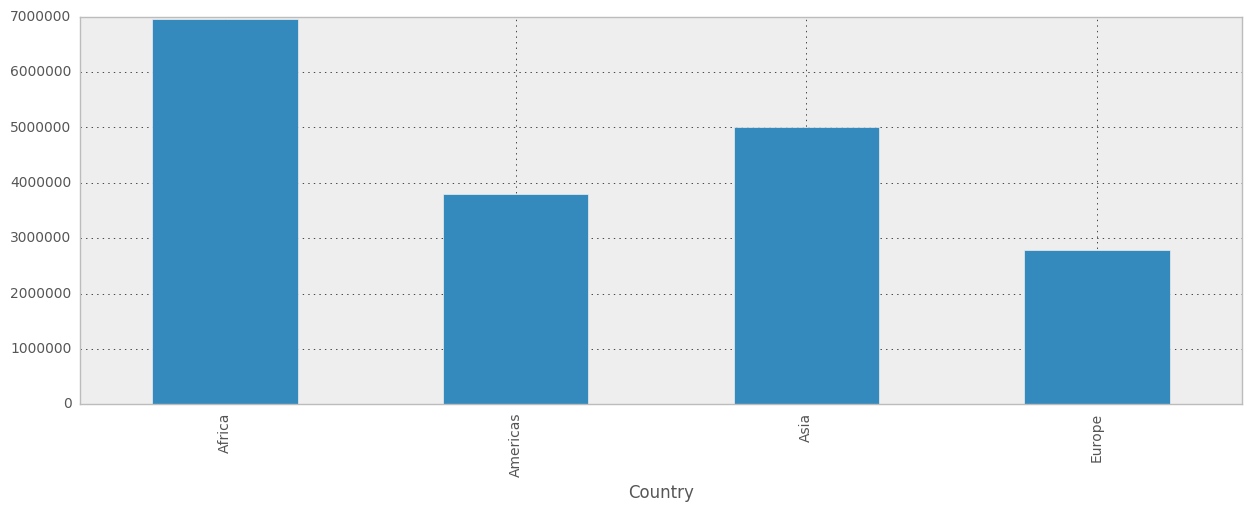

In [88]:
vsota_celine = cel.groupby("Country")["Value"].aggregate(sum)
vsota_celine.plot(kind = "bar")


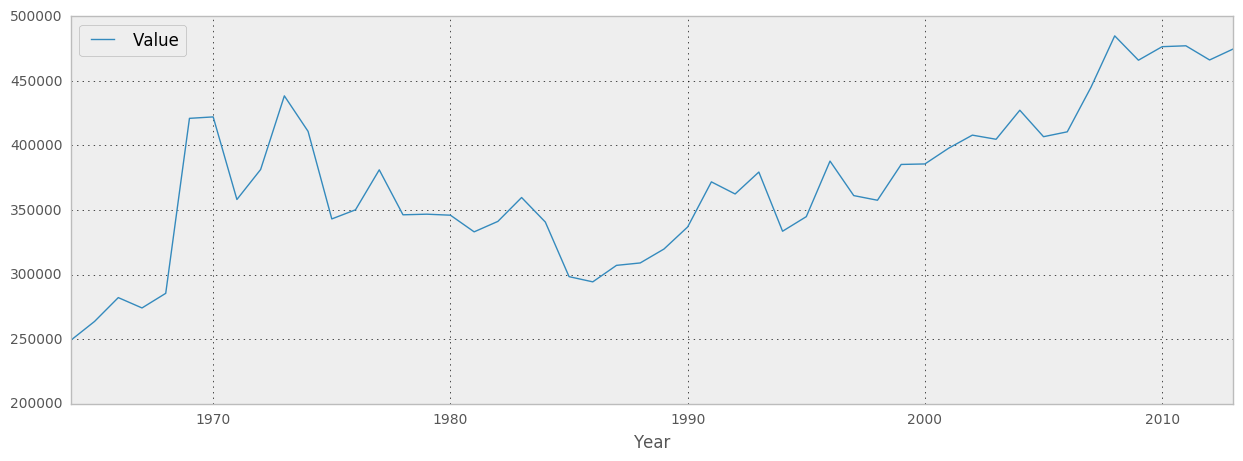

In [89]:
cel.groupby("Year").aggregate(sum).plot()

In [90]:
celine.groupby("Country")